# Digital Signal and Image Fundamentals

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
img01 = cv2.imread('/content/94071.jpg', cv2.IMREAD_UNCHANGED)
#cv2_imshow(img01)

gray leyer 

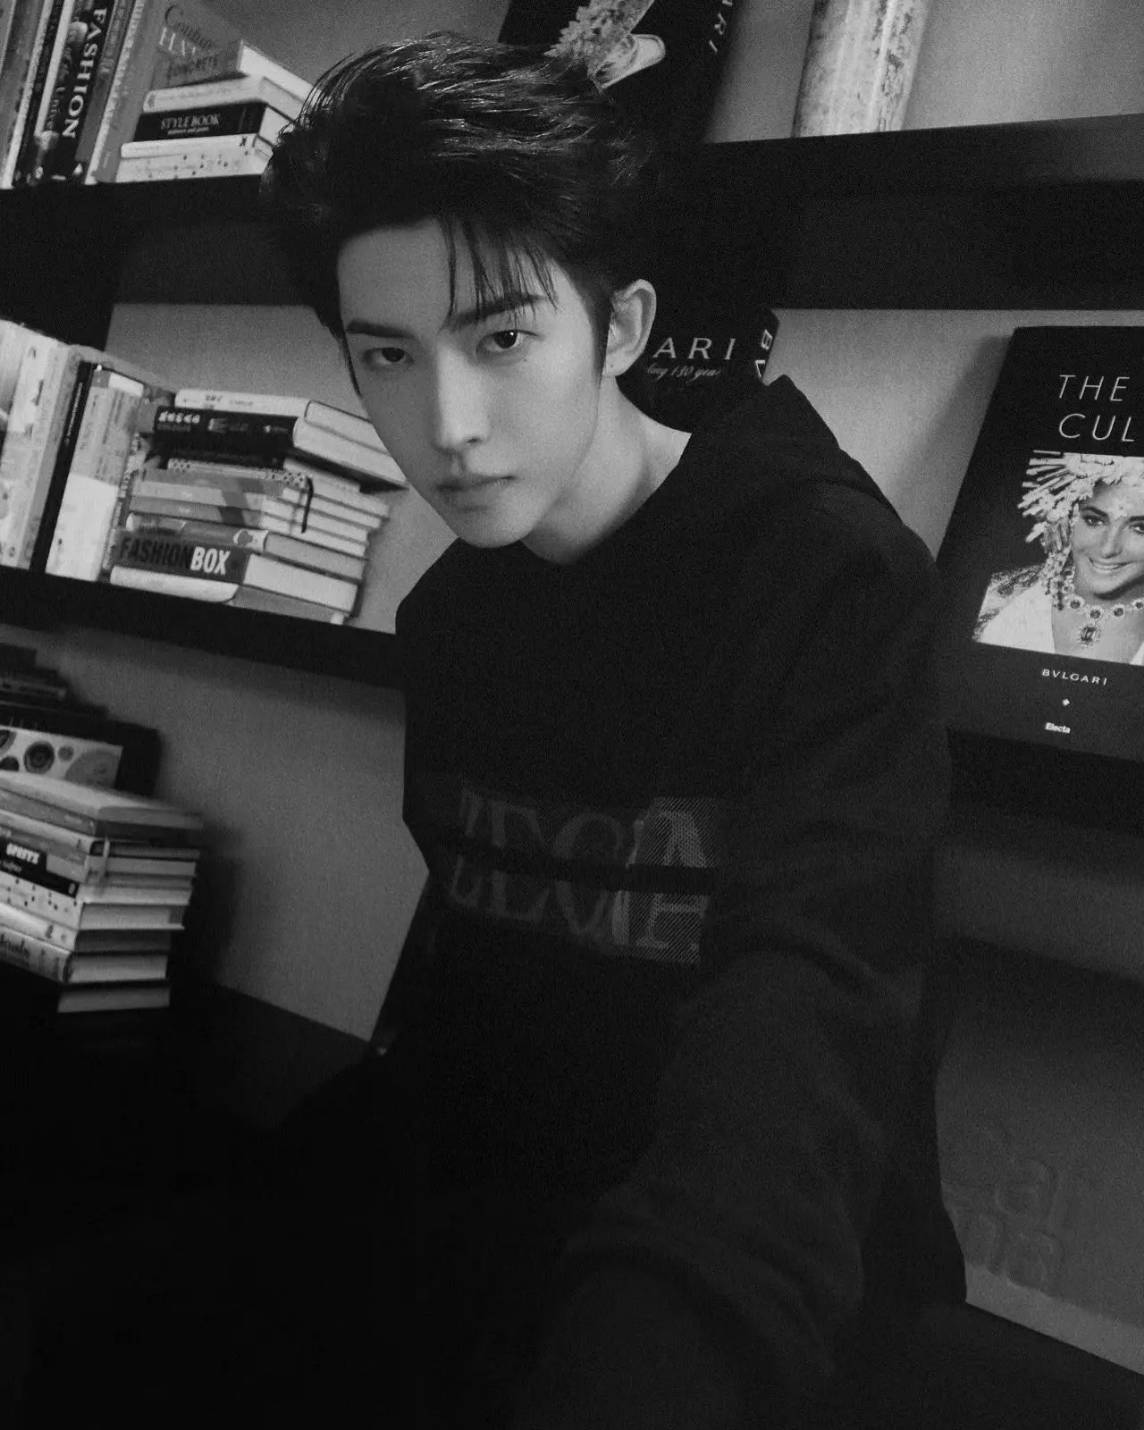

In [ ]:
img1 = cv2.imread('/content/94071.jpg', 0) #gray leyer ใส่0
cv2_imshow(img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

color layer

In [ ]:
img = cv2.imread('/content/94071.jpg')
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

ColorMap

In [ ]:
img_gray = cv2.imread('/content/94071.jpg', 0)
img_color = cv2.applyColorMap(img_gray, cv2.COLORMAP_OCEAN)
cv2_imshow(img_gray)
cv2_imshow(img_color)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Homework

In [2]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

In [3]:
imghw = cv2.imread("/content/94897.jpg")

In [ ]:
#cv2_imshow(imghw)

ลดขนาดภาพแบบรักษาอัตราส่วนภาพ

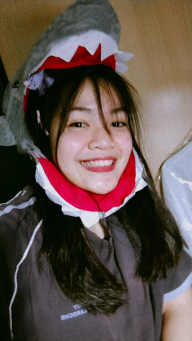

In [4]:
scale_percent = 20 # percent of original size
width = int(imghw.shape[1] * scale_percent / 100)
height = int(imghw.shape[0] * scale_percent / 100)
dim = (width, height)
resized = cv2.resize(imghw, dim, interpolation = cv2.INTER_AREA)
cv2_imshow(resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

1.Program that can insert your name and id

In [ ]:
path = cv2.imread('resized', cv2.IMREAD_UNCHANGED) # path
font = cv2.FONT_HERSHEY_TRIPLEX # font
org = (5, 50) # org
fontScale = 0.23 # fontScale
color = (200, 255, 153)
thickness = 1
image = cv2.putText(resized, 'Name: Jantharat Chumsang ID: 62070505216', org, font, 
                   fontScale, color, thickness, cv2.LINE_AA)  # Using cv2.putText() method
cv2_imshow(image) # Displaying the image

2.Program of super resolution

Nearest Neighbor Interpolation

In [ ]:
resized_nea = cv2.resize(resized, (512, 512), 0, 0, interpolation = cv2.INTER_NEAREST)
cv2_imshow(resized_nea)

Bilinear Interpolation

In [ ]:
resized_bili = cv2.resize(resized, (512, 512), 10, 10, interpolation = cv2.INTER_LINEAR)
cv2_imshow(resized_bili)

Bicubic Interpolation

In [ ]:
resized_bicu = cv2.resize(resized, (512, 512), 10, 10, interpolation = cv2.INTER_CUBIC)
cv2_imshow(resized_bicu)

3.Program of gray level resolution

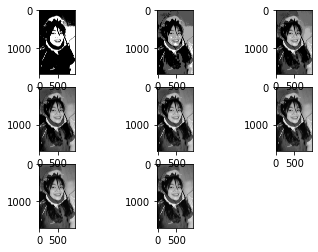

In [ ]:
img_gray = cv2.cvtColor(imghw,cv2.COLOR_BGR2GRAY)
k = 8
#cv2_imshow(img_gray)
while (k > 0):
  reducedImage = np.uint8((np.single(img_gray)/256)*(2**k))
  plt.subplot(3, 3, k)
  plt.imshow(reducedImage,'gray')
  title=['Grey-level resolution 2^ %s',k]
  k = k - 1

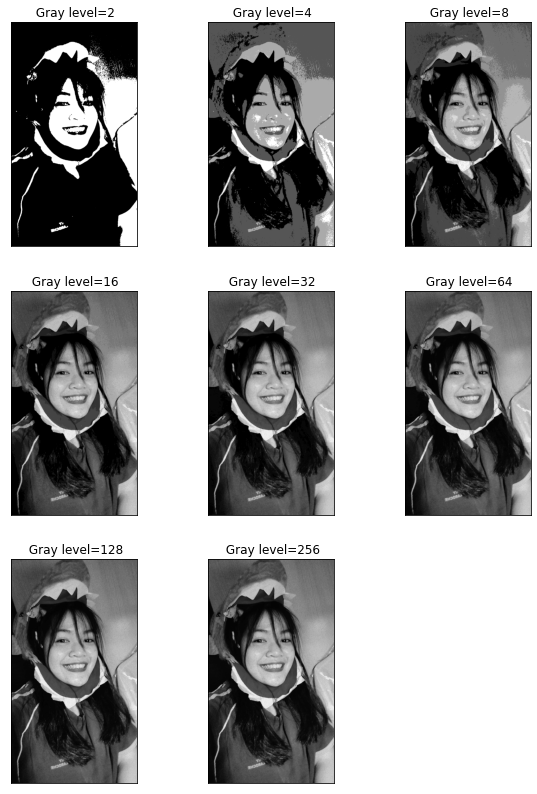

In [9]:
img_gray = cv2.cvtColor(imghw,cv2.COLOR_BGR2GRAY)
titles = [u' The original image ', u' Gray level=2', u' Gray level=4', u' Gray level=8',
          u' Gray level=16', u' Gray level=32', u' Gray level=64', u' Gray level=128', u' Gray level=256']
k = 8
plt.figure(figsize=[10,14])
while (k > 0):
  reducedImage = np.uint8((np.single(img_gray)/256)*(2**k))
  plt.subplot(3, 3, k)
  plt.title(titles[k])
  plt.imshow(reducedImage,'gray')
  plt.xticks([]), plt.yticks([])
  title=['Grey-level resolution 2^ %s',k]
  k = k - 1

ถ้าเอาไปใส่ช่องแบบ matrix ทำการแยกclass level ด้วย KMEANS

In [ ]:
#  Image two-dimensional pixel into one-dimensional 
data = resized.reshape((-1, 3))
data = np.float32(data)

#  Defining the center  (type,max_iter,epsilon)
criteria = (cv2.TERM_CRITERIA_EPS +
            cv2.TERM_CRITERIA_MAX_ITER, 20, 2.0)

#  Set the label 
flags = cv2.KMEANS_RANDOM_CENTERS

# Clustering   Gather and integrate 2-256 Class 
compactness, labels2, centers2 = cv2.kmeans(data, 2, None, criteria, 20, flags)
compactness, labels4, centers4 = cv2.kmeans(data, 4, None, criteria, 20, flags)
compactness, labels8, centers8 = cv2.kmeans(data, 8, None, criteria, 20, flags)
compactness, labels16, centers16 = cv2.kmeans(data, 16, None, criteria, 20, flags)
compactness, labels32, centers32 = cv2.kmeans(data, 32, None, criteria, 20, flags)
compactness, labels64, centers64 = cv2.kmeans(data, 64, None, criteria, 20, flags)
compactness, labels128, centers128 = cv2.kmeans(data, 128, None, criteria, 20, flags)
compactness, labels256, centers256 = cv2.kmeans(data, 256, None, criteria, 20, flags)

In [ ]:
#  The image changes back to uint8 Two dimensional type 
centers2 = np.uint8(centers2)
res = centers2[labels2.flatten()]
dst2 = res.reshape((resized.shape))

centers4 = np.uint8(centers4)
res = centers4[labels4.flatten()]
dst4 = res.reshape((resized.shape))

centers8 = np.uint8(centers8)
res = centers8[labels8.flatten()]
dst8 = res.reshape((resized.shape))

centers16 = np.uint8(centers16)
res = centers16[labels16.flatten()]
dst16 = res.reshape((resized.shape))

centers32 = np.uint8(centers32)
res = centers32[labels32.flatten()]
dst32 = res.reshape((resized.shape))

centers64 = np.uint8(centers64)
res = centers64[labels64.flatten()]
dst64 = res.reshape((resized.shape))

centers128 = np.uint8(centers128)
res = centers128[labels128.flatten()]
dst128 = res.reshape((resized.shape))

centers256 = np.uint8(centers256)
res = centers256[labels256.flatten()]
dst256 = res.reshape((resized.shape))


#  The image is transformed into RGB Display 
img = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
dst2 = cv2.cvtColor(dst2, cv2.COLOR_BGR2GRAY)
dst4 = cv2.cvtColor(dst4, cv2.COLOR_BGR2GRAY)
dst8 = cv2.cvtColor(dst8, cv2.COLOR_BGR2GRAY)
dst16 = cv2.cvtColor(dst16, cv2.COLOR_BGR2GRAY)
dst32 = cv2.cvtColor(dst32, cv2.COLOR_BGR2GRAY)
dst64 = cv2.cvtColor(dst64, cv2.COLOR_BGR2GRAY)
dst128 = cv2.cvtColor(dst128, cv2.COLOR_BGR2GRAY)
dst256 = cv2.cvtColor(dst256, cv2.COLOR_BGR2GRAY)

In [ ]:
#  Show the image 
titles = [u' The original image ', u' Gray level=2', u' Gray level=4', u' Gray level=8',
          u' Gray level=16', u' Gray level=32', u' Gray level=64', u' Gray level=128', u' Gray level=256']
images = [img, dst2, dst4, dst8, dst16, dst32, dst64, dst128, dst256]
for i in range(9):
    plt.subplot(3, 3, i + 1), plt.imshow(images[i], 'gray'),
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()